In [15]:
## libraries
from sklearn.preprocessing import OneHotEncoder

import os, pickle
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [3]:
## dataset
def load_cifar10(path):
    data, labels = [], []
    for i in range(1, 6):
        with open(os.path.join(path, f"data_batch_{i}"), 'rb') as f:
            batch = pickle.load(f, encoding='bytes')
            data.append(batch[b'data'])
            labels += batch[b'labels']
    X = np.concatenate(data).astype(np.float32) / 255.0
    y = np.array(labels).reshape(-1, 1)
    return X, y

def load_cifar10_test(path):
    with open(os.path.join(path, "test_batch"), 'rb') as f:
        batch = pickle.load(f, encoding='bytes')
        X = batch[b'data'].astype(np.float32) / 255.0
        y = np.array(batch[b'labels']).reshape(-1, 1)
    return X, y

In [4]:
## ANN 
class ANN:
    def __init__(self, input_dim, hidden_layers, output_dim, lr=0.1):
        self.lr = lr
        self.layers = []
        prev = input_dim
        for h in hidden_layers:
            self.layers.append({
                "W": np.random.randn(prev, h) * 0.01,
                "b": np.zeros((1, h))
            })
            prev = h
        self.out = {
            "W": np.random.randn(prev, output_dim) * 0.01,
            "b": np.zeros((1, output_dim))
        }

    def sigmoid(self, z): 
        return 1 / (1 + np.exp(-z))

    def sigmoid_deriv(self, a): 
        return a * (1 - a)

    def softmax(self, z):
        z -= np.max(z, axis=1, keepdims=True)
        exp = np.exp(z)
        return exp / np.sum(exp, axis=1, keepdims=True)

    def forward(self, X):
        self.cache = [{'a': X}]
        a = X
        for layer in self.layers:
            z = a @ layer['W'] + layer['b']
            a = self.sigmoid(z)
            self.cache.append({'a': a, 'z': z})
        z_out = a @ self.out['W'] + self.out['b']
        a_out = self.softmax(z_out)
        self.cache.append({'a': a_out, 'z': z_out})
        return a_out

    def backward(self, X, Y, out):
        m = X.shape[0]
        dz = (out - Y) / m

        # output layer update
        a_prev = self.cache[-2]['a']
        dW = a_prev.T @ dz
        db = np.sum(dz, axis=0, keepdims=True)
        self.out['W'] -= self.lr * dW
        self.out['b'] -= self.lr * db
        da = dz @ self.out['W'].T

        # hidden layers
        for i in reversed(range(len(self.layers))):
            a_curr = self.cache[i+1]['a']
            a_prev = self.cache[i]['a']
            dz = da * self.sigmoid_deriv(a_curr)
            dW = a_prev.T @ dz
            db = np.sum(dz, axis=0, keepdims=True)
            self.layers[i]['W'] -= self.lr * dW
            self.layers[i]['b'] -= self.lr * db
            da = dz @ self.layers[i]['W'].T

    def loss(self, Y, out):
        return -np.mean(np.sum(Y * np.log(out + 1e-9), axis=1))

    def predict(self, X):
        probs = self.forward(X)
        return np.argmax(probs, axis=1)




In [22]:
def train_model(X_train, Y_train, X_test, Y_test, layers, name, epochs=10, lr=0.1):
    model = ANN(3072, layers, 10, lr)
    losses=[]
    best_acc = 0
    accs=[]
    for epoch in range(epochs):
        out = model.forward(X_train)
        loss = model.loss(Y_train, out)
        losses.append(loss)
        
        model.backward(X_train, Y_train, out)
        preds = model.predict(X_test)
        acc = accuracy_score(np.argmax(Y_test, axis=1), preds)
        accs.append(acc)
        print(f"{name} | Epoch {epoch+1}/{epochs} | Loss={loss:.4f} | Acc={acc:.4f}")
        if acc > best_acc:
            best_acc = acc
            np.savez(f"{name}_best_weights.npz",
                     layers=model.layers, out=model.out)
    print(f"Best accuracy for {name}: {best_acc:.4f}")
    return losses,accs



In [23]:
X_train, y_train = load_cifar10("cifar")
X_test, y_test = load_cifar10_test("cifar")

enc = OneHotEncoder(sparse_output=False)
Y_train = enc.fit_transform(y_train)
Y_test = enc.transform(y_test)



In [27]:
losses,accs=train_model(X_train, Y_train, X_test, Y_test, [100], "model_1layer", epochs=10, lr=0.2)

model_1layer | Epoch 1/10 | Loss=2.3036 | Acc=0.0958
model_1layer | Epoch 2/10 | Loss=2.3025 | Acc=0.1256
model_1layer | Epoch 3/10 | Loss=2.3020 | Acc=0.1391
model_1layer | Epoch 4/10 | Loss=2.3017 | Acc=0.1431
model_1layer | Epoch 5/10 | Loss=2.3014 | Acc=0.1467
model_1layer | Epoch 6/10 | Loss=2.3011 | Acc=0.1555
model_1layer | Epoch 7/10 | Loss=2.3008 | Acc=0.1628
model_1layer | Epoch 8/10 | Loss=2.3005 | Acc=0.1713
model_1layer | Epoch 9/10 | Loss=2.3001 | Acc=0.1763
model_1layer | Epoch 10/10 | Loss=2.2998 | Acc=0.1834
Best accuracy for model_1layer: 0.1834


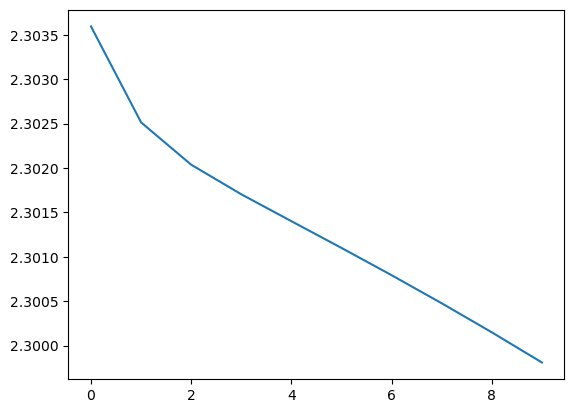

In [28]:
plt.plot(losses)

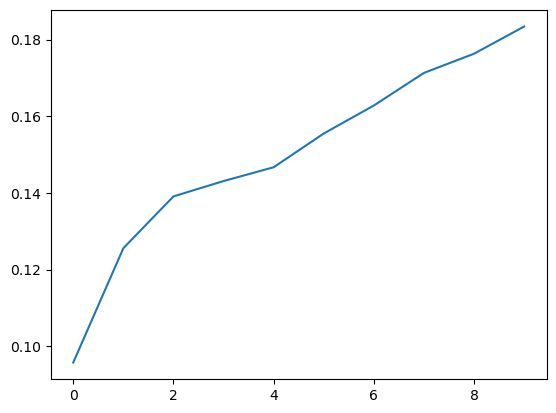

In [29]:
plt.plot(accs)

In [30]:

losses,accs=train_model(X_train, Y_train, X_test, Y_test, [100], "model_1layer", epochs=10, lr=0.3)


model_1layer | Epoch 1/10 | Loss=2.3040 | Acc=0.1273
model_1layer | Epoch 2/10 | Loss=2.3024 | Acc=0.1195
model_1layer | Epoch 3/10 | Loss=2.3019 | Acc=0.1456
model_1layer | Epoch 4/10 | Loss=2.3014 | Acc=0.1651
model_1layer | Epoch 5/10 | Loss=2.3009 | Acc=0.1792
model_1layer | Epoch 6/10 | Loss=2.3004 | Acc=0.1907
model_1layer | Epoch 7/10 | Loss=2.2999 | Acc=0.1979
model_1layer | Epoch 8/10 | Loss=2.2994 | Acc=0.2047
model_1layer | Epoch 9/10 | Loss=2.2988 | Acc=0.2082
model_1layer | Epoch 10/10 | Loss=2.2982 | Acc=0.2105
Best accuracy for model_1layer: 0.2105


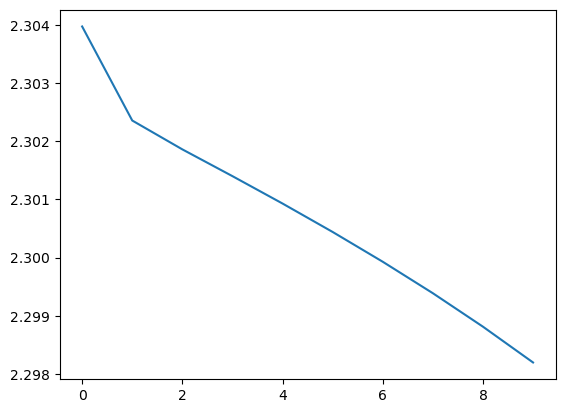

In [31]:
plt.plot(losses)


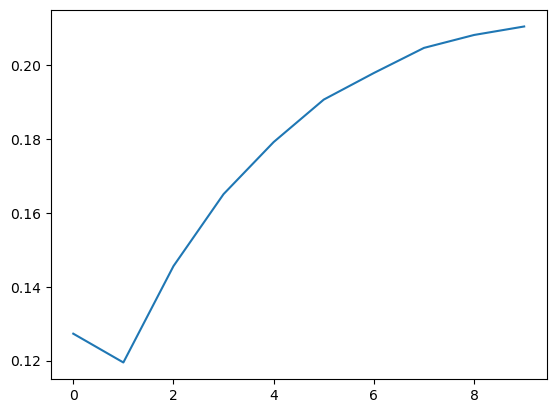

In [32]:
plt.plot(accs)

In [33]:
losses,accs=train_model(X_train, Y_train, X_test, Y_test, [100], "model_1layer", epochs=10, lr=0.4)

model_1layer | Epoch 1/10 | Loss=2.3032 | Acc=0.1244
model_1layer | Epoch 2/10 | Loss=2.3019 | Acc=0.1114
model_1layer | Epoch 3/10 | Loss=2.3014 | Acc=0.1300
model_1layer | Epoch 4/10 | Loss=2.3008 | Acc=0.1415
model_1layer | Epoch 5/10 | Loss=2.3002 | Acc=0.1534
model_1layer | Epoch 6/10 | Loss=2.2995 | Acc=0.1670
model_1layer | Epoch 7/10 | Loss=2.2988 | Acc=0.1747
model_1layer | Epoch 8/10 | Loss=2.2980 | Acc=0.1819
model_1layer | Epoch 9/10 | Loss=2.2971 | Acc=0.1861
model_1layer | Epoch 10/10 | Loss=2.2961 | Acc=0.1932
Best accuracy for model_1layer: 0.1932


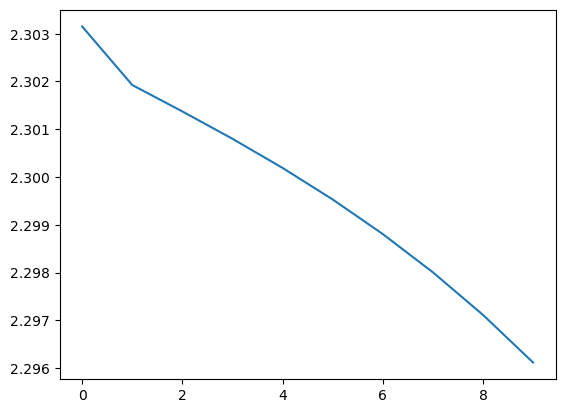

In [34]:
plt.plot(losses)

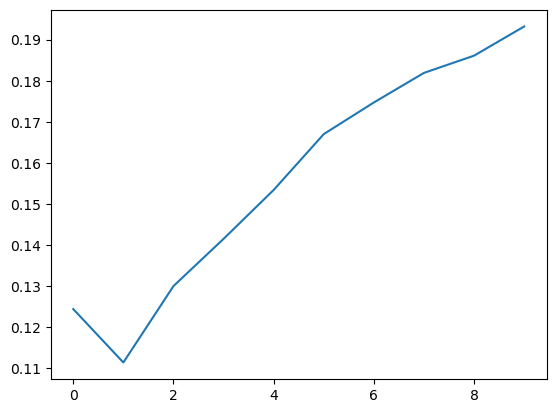

In [35]:
plt.plot(accs)

In [36]:
losses,accs=train_model(X_train, Y_train, X_test, Y_test, [100], "model_1layer", epochs=10, lr=0.5)

model_1layer | Epoch 1/10 | Loss=2.3031 | Acc=0.1051
model_1layer | Epoch 2/10 | Loss=2.3018 | Acc=0.1456
model_1layer | Epoch 3/10 | Loss=2.3009 | Acc=0.1656
model_1layer | Epoch 4/10 | Loss=2.3001 | Acc=0.1761
model_1layer | Epoch 5/10 | Loss=2.2993 | Acc=0.1963
model_1layer | Epoch 6/10 | Loss=2.2983 | Acc=0.2012
model_1layer | Epoch 7/10 | Loss=2.2973 | Acc=0.2104
model_1layer | Epoch 8/10 | Loss=2.2960 | Acc=0.2156
model_1layer | Epoch 9/10 | Loss=2.2946 | Acc=0.2198
model_1layer | Epoch 10/10 | Loss=2.2930 | Acc=0.2233
Best accuracy for model_1layer: 0.2233


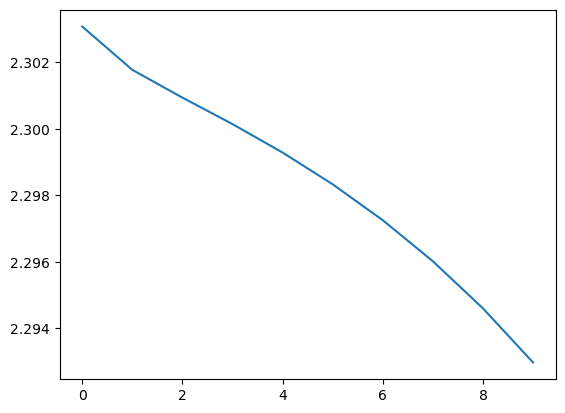

In [37]:
plt.plot(losses)

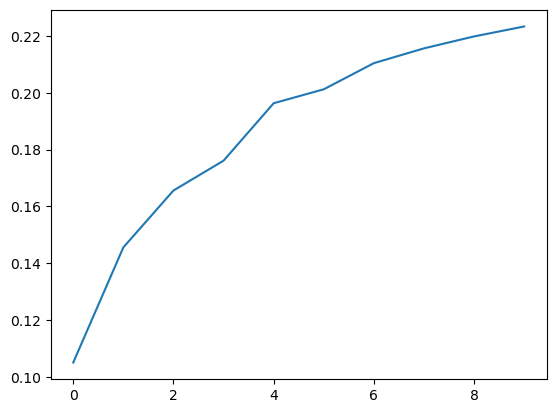

In [38]:
plt.plot(accs)

In [39]:
train_model(X_train, Y_train, X_test, Y_test, [100, 50, 50], "model_3layer", epochs=10, lr=0.1)

model_3layer | Epoch 1/10 | Loss=2.3027 | Acc=0.1000
model_3layer | Epoch 2/10 | Loss=2.3027 | Acc=0.1000
model_3layer | Epoch 3/10 | Loss=2.3027 | Acc=0.1000
model_3layer | Epoch 4/10 | Loss=2.3026 | Acc=0.1000
model_3layer | Epoch 5/10 | Loss=2.3026 | Acc=0.1000
model_3layer | Epoch 6/10 | Loss=2.3026 | Acc=0.1000
model_3layer | Epoch 7/10 | Loss=2.3026 | Acc=0.1000
model_3layer | Epoch 8/10 | Loss=2.3026 | Acc=0.1000
model_3layer | Epoch 9/10 | Loss=2.3026 | Acc=0.1000
model_3layer | Epoch 10/10 | Loss=2.3026 | Acc=0.1000
Best accuracy for model_3layer: 0.1000


([np.float64(2.3027240688113224),
  np.float64(2.302689110178927),
  np.float64(2.302662946450074),
  np.float64(2.3026433650629654),
  np.float64(2.3026287101028378),
  np.float64(2.302617742227536),
  np.float64(2.302609533861487),
  np.float64(2.3026033907668606),
  np.float64(2.3025987933479506),
  np.float64(2.302595352721252)],
 [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

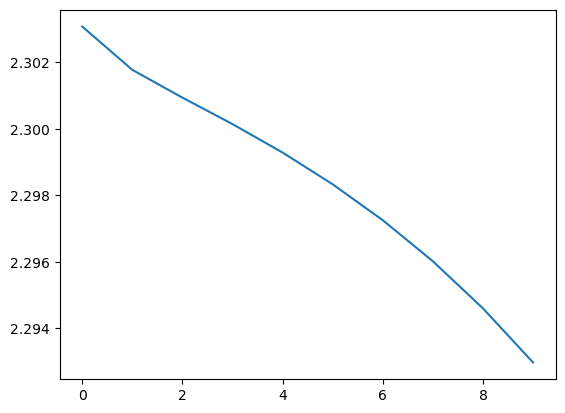

In [40]:
plt.plot(losses)

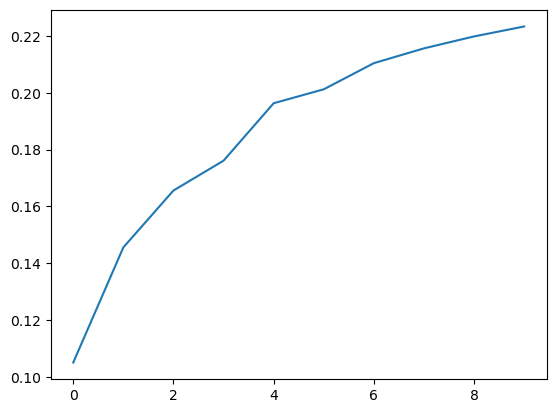

In [41]:
plt.plot(accs)

In [42]:
train_model(X_train, Y_train, X_test, Y_test, [100, 50, 50], "model_3layer", epochs=10, lr=0.2)

model_3layer | Epoch 1/10 | Loss=2.3030 | Acc=0.1000
model_3layer | Epoch 2/10 | Loss=2.3028 | Acc=0.1000
model_3layer | Epoch 3/10 | Loss=2.3027 | Acc=0.1000
model_3layer | Epoch 4/10 | Loss=2.3026 | Acc=0.1000
model_3layer | Epoch 5/10 | Loss=2.3026 | Acc=0.1000
model_3layer | Epoch 6/10 | Loss=2.3026 | Acc=0.1000
model_3layer | Epoch 7/10 | Loss=2.3026 | Acc=0.1000
model_3layer | Epoch 8/10 | Loss=2.3026 | Acc=0.1000
model_3layer | Epoch 9/10 | Loss=2.3026 | Acc=0.1000
model_3layer | Epoch 10/10 | Loss=2.3026 | Acc=0.1000
Best accuracy for model_3layer: 0.1000


([np.float64(2.302995336446611),
  np.float64(2.3028033040796743),
  np.float64(2.302701293026481),
  np.float64(2.302647005942636),
  np.float64(2.302618082457255),
  np.float64(2.3026026604420813),
  np.float64(2.3025944330796277),
  np.float64(2.302590042325484),
  np.float64(2.3025876984727334),
  np.float64(2.3025864470505235)],
 [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

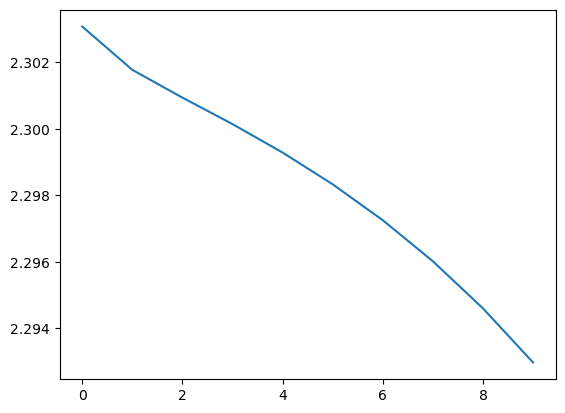

In [43]:
plt.plot(losses)

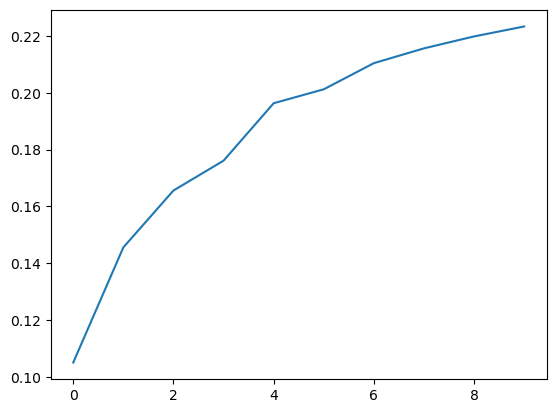

In [44]:
plt.plot(accs)